### Pytorch For Beginners/Fashion MNIST Dataset
This is a Pytorch practice for a beginners in deep learning. Often this is considered as Hello World in Deep Learning. 
This notebook an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

In [ ]:
# Import the required libraries
import torch
import numpy as np

In [2]:
# Initialize the Tensor
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
# This converted the data into the type of tensor.

In [3]:
# Convert from Numpy array to Pytorch
np_array = np.array(data)
x_np = torch.from_numpy(np_array)


In [8]:
# From another Tensor
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype= torch.float)
print(f"Random Tensor: \n {x_rand} \n ")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6667, 0.0775],
        [0.2097, 0.5738]]) 
 


In [ ]:
# Printing the various properties of Tensor
tensor = torch.rand(3,4)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)


torch.Size([3, 4])
torch.float32
cpu


In [10]:
# Tensor Operations:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on {tensor.device}")
else:
    print(f'Device is running in {tensor.device}')


Device is running in cpu


In [2]:
# Import the relevant Machine Learning Libraries:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [3]:
# Pass the training data and the test data from the Fashion MNIST Dataset
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:10<00:00, 2.64MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 78.1kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.19MB/s]


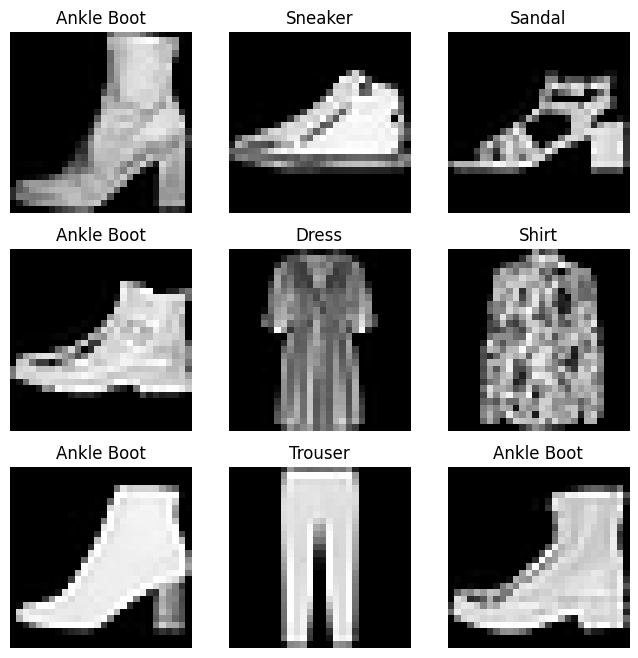

In [8]:
# Visualize the data with the Matplotlib

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize= (8,8))
cols,rows = 3,3

for i in range (1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [9]:
# Creating custom datasets for the files:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # Initialize the self function
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.readcsv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self(len.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image.img_path
        label = self.img_labels.iloc[idx,0]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [10]:
# Preparing the data for training with DataLoaders:

# First import the Dataloader library
from torch.utils.data import DataLoader

# Then create two variables for train and test data with batch size = 64
train_dataloader = DataLoader(training_data, batch_size= 64, shuffle= True)
test_dataloader = DataLoader(test_data, batch_size= 64, shuffle= True)


Features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


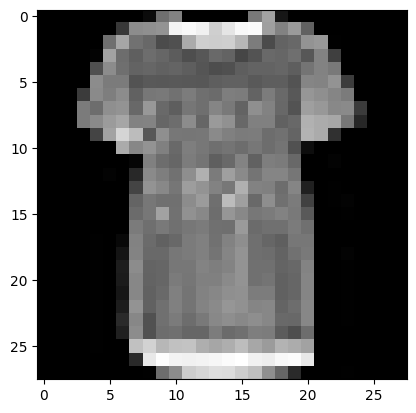

Label: 0
The item in the label is: T-Shirt


In [15]:
# Retrieve a batch of data from the DataLoader
train_features, train_labels = next(iter(train_dataloader))

# Print the shape of the feature and label batches
print(f"Features batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Select the first image in the batch and remove the channel dimension
img = train_features[0].squeeze()

# Get the corresponding label
label = train_labels[0]
label_name = labels_map[label.item()]  # Use .item() to convert tensor to Python scalar

# Display the image
plt.imshow(img, cmap="gray")
plt.show()

# Print the label
print(f'Label: {label}')
print(f"The item in the label is: {label_name}")
